# Importing Libraries

In [1]:
import pandas as pd
import math
import numpy as np
from scipy.stats import norm
from scipy import stats

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from google.colab import drive
#drive.mount('/IMDB_data_NoDup.csv')

# Importing and reading csv movie dataset 
The size of the file is too big 350039x16. So will continue only with the 5000 data. 

In [3]:
IMDB_data_NoDup = "C:\\Users\\vishd\\Desktop\\reetu\\Springboard course\\Data wrangling IMDB dataset\\IMDB_data_NoDup.csv"
#IMDB_data_NoDup.head()
#IMDB_data_NoDup = "/content/IMDB_data_NoDup.csv"
#IMDB_data_NoDup = pd.read_csv(IMDB_data_NoDup, sep='\t')
#IMDB_data_NoDup.shape
IMDB_data_NoDup = pd.read_csv(IMDB_data_NoDup, sep='\t', nrows = 5000)#, delimiter=',', header=None, skiprows=1)#, names=['LABEL','F1','F2','F3','F4','F5','X','Y','Z','C1','C2'])                                                # loading first files
IMDB_data_NoDup.head()


Index    titleId                                 title region titleType  \
0      0  tt0000019                      The Clown Barber     GB     short   
1      2  tt0271697                    Our New Errand Boy     GB     short   
2      5  tt0274177  Two Naughty Boys Teasing the Cobbler     GB     short   
3     14  tt0308848                      Saved by a Dream     GB     short   
4     30  tt0454320                           £100 Reward     GB     short   

   startYear        genres  directors    writers  AveRating  Num_of_Votes  \
0     1898.0  Comedy,Short  nm0932055         \N        5.3          19.0   
1     1905.0  Comedy,Short  nm0932055         \N        5.4          98.0   
2     1898.0  Comedy,Short  nm0932055  nm0932055        4.4           7.0   
3     1909.0   Drama,Short  nm0932055         \N        6.3           6.0   
4     1908.0   Drama,Short  nm0932055         \N        5.3          12.0   

  primaryName_Director birthYear_Director deathYear  \
0     James Williamson             1855.0    1933.0   
1     James Williamson             1855.0    1933.0   
2     James Williamson             1855.0    1933.0   
3     James Williamson             1855.0    1933.0   
4     James Williamson             1855.0    1933.0   

        primaryProfession_director                       Dir_knownForTitles  
0  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
1  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
2  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
3  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
4  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763

# Droping one index col. 
Here we have two columns with index #. Need to drop index. 

In [4]:
IMDB_data_NoDup = IMDB_data_NoDup.drop(['Index'], axis = 1)                                             #dropping index column


# Basic Statistics 
Below is the basis statistics for our data set

In [5]:
IMDB_data_NoDup.describe()

startYear    AveRating  Num_of_Votes
count  5000.000000  5000.000000   5000.000000
mean   1926.331600     5.806900     29.539600
std      18.794496     1.241449     45.563438
min    1894.000000     1.000000      5.000000
25%    1912.000000     5.000000      8.000000
50%    1926.000000     5.800000     13.000000
75%    1937.000000     6.600000     31.000000
max    2017.000000    10.000000    590.000000

# Converting years  to numeric columns

In [6]:
#converting year col ot numeric type

In [7]:
IMDB_data_NoDup['startYear'] = pd.to_numeric(IMDB_data_NoDup['startYear'], errors='coerce')
IMDB_data_NoDup['startYear'] = IMDB_data_NoDup["startYear"].convert_dtypes() 

IMDB_data_NoDup['startYear'].unique()

<IntegerArray>
[1898, 1905, 1909, 1908, 1906, 1900, 1901, 1897, 1895, 1896, 1894, 1903, 1899,
 1907, 1910, 1904, 1902, 1913, 1911, 1915, 1912, 1920, 1914, 1923, 1921, 1919,
 1922, 1936, 1916, 1917, 1926, 1932, 1933, 1928, 1927, 1929, 1931, 1935, 1930,
 1918, 1946, 1937, 1938, 1925, 1942, 1944, 1934, 1939, 1924, 2017, 1956, 1945,
 1950, 1940, 1943, 1953, 1954, 1957, 1959, 1960, 1968, 1962, 1964, 1965, 1967,
 1961, 1963, 1969, 1970, 1972, 1966, 1941, 1952, 1955, 1958, 1947, 1948, 1949,
 1951, 2011, 1974, 1973, 2004, 1999, 1971, 1975, 2014, 1977, 1978, 1981, 1982,
 1984, 2005]
Length: 93, dtype: Int64

In [8]:
#Converting death year col to numeric

In [9]:
IMDB_data_NoDup['deathYear'] = pd.to_numeric(IMDB_data_NoDup["deathYear"], errors='coerce')
IMDB_data_NoDup['deathYear'] = IMDB_data_NoDup["deathYear" ].convert_dtypes() 

In [10]:
# converting birthyear_Director col ot Numeric

In [11]:
IMDB_data_NoDup['birthYear_Director'] = pd.to_numeric(IMDB_data_NoDup["birthYear_Director"], errors='coerce')
IMDB_data_NoDup['birthYear_Director'] = IMDB_data_NoDup["birthYear_Director"].convert_dtypes() 


In [12]:
IMDB_data_NoDup.head()

titleId                                 title region titleType  \
0  tt0000019                      The Clown Barber     GB     short   
1  tt0271697                    Our New Errand Boy     GB     short   
2  tt0274177  Two Naughty Boys Teasing the Cobbler     GB     short   
3  tt0308848                      Saved by a Dream     GB     short   
4  tt0454320                           £100 Reward     GB     short   

   startYear        genres  directors    writers  AveRating  Num_of_Votes  \
0       1898  Comedy,Short  nm0932055         \N        5.3          19.0   
1       1905  Comedy,Short  nm0932055         \N        5.4          98.0   
2       1898  Comedy,Short  nm0932055  nm0932055        4.4           7.0   
3       1909   Drama,Short  nm0932055         \N        6.3           6.0   
4       1908   Drama,Short  nm0932055         \N        5.3          12.0   

  primaryName_Director  birthYear_Director  deathYear  \
0     James Williamson                1855       1933   
1     James Williamson                1855       1933   
2     James Williamson                1855       1933   
3     James Williamson                1855       1933   
4     James Williamson                1855       1933   

        primaryProfession_director                       Dir_knownForTitles  
0  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
1  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
2  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
3  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
4  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763

In [13]:
# We can see the type of startYear is int

In [14]:
IMDB_data_NoDup['startYear'].dtype

Int64Dtype()

In [15]:
# Calculating the age of the movie

In [16]:
Cuurent_year = 2021
IMDB_data_NoDup['Age_of_movie'] = Cuurent_year - IMDB_data_NoDup['startYear'] 

In [17]:
IMDB_data_NoDup.head()

titleId                                 title region titleType  \
0  tt0000019                      The Clown Barber     GB     short   
1  tt0271697                    Our New Errand Boy     GB     short   
2  tt0274177  Two Naughty Boys Teasing the Cobbler     GB     short   
3  tt0308848                      Saved by a Dream     GB     short   
4  tt0454320                           £100 Reward     GB     short   

   startYear        genres  directors    writers  AveRating  Num_of_Votes  \
0       1898  Comedy,Short  nm0932055         \N        5.3          19.0   
1       1905  Comedy,Short  nm0932055         \N        5.4          98.0   
2       1898  Comedy,Short  nm0932055  nm0932055        4.4           7.0   
3       1909   Drama,Short  nm0932055         \N        6.3           6.0   
4       1908   Drama,Short  nm0932055         \N        5.3          12.0   

  primaryName_Director  birthYear_Director  deathYear  \
0     James Williamson                1855       1933   
1     James Williamson                1855       1933   
2     James Williamson                1855       1933   
3     James Williamson                1855       1933   
4     James Williamson                1855       1933   

        primaryProfession_director                       Dir_knownForTitles  \
0  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
1  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
2  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
3  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
4  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   

   Age_of_movie  
0           123  
1           116  
2           123  
3           112  
4           113

In [18]:
IMDB_data_NoDup['Age_of_movie'].unique() 

<IntegerArray>
[123, 116, 112, 113, 115, 121, 120, 124, 126, 125, 127, 118, 122, 114, 111,
 117, 119, 108, 110, 106, 109, 101, 107,  98, 100, 102,  99,  85, 105, 104,
  95,  89,  88,  93,  94,  92,  90,  86,  91, 103,  75,  84,  83,  96,  79,
  77,  87,  82,  97,   4,  65,  76,  71,  81,  78,  68,  67,  64,  62,  61,
  53,  59,  57,  56,  54,  60,  58,  52,  51,  49,  55,  80,  69,  66,  63,
  74,  73,  72,  70,  10,  47,  48,  17,  22,  50,  46,   7,  44,  43,  40,
  39,  37,  16]
Length: 93, dtype: Int64

In [19]:
IMDB_data_NoDup['birthYear_Director'].unique()

<IntegerArray>
[1855, 1854, 1847, 1861, <NA>, 1860, 1873, 1872, 1869, 1874, 1875, 1870, 1864,
 1859, 1851, 1862, 1884, 1880, 1871, 1877, 1868, 1858, 1852, 1867, 1886, 1879,
 1876, 1863, 1885, 1881, 1853, 1878, 1883, 1865, 1882, 1888, 1887, 1857, 1891,
 1894, 1893, 1866, 1890, 1889, 1856, 1892, 1898, 1895, 1899, 1896, 1897, 1901,
 1902, 1900, 1903, 1904, 1908, 1906, 1910, 1905, 1907, 1909, 1911, 1922]
Length: 64, dtype: Int64

# Calculating the age of the directors

In [20]:
IMDB_data_NoDup['Director_age'] = IMDB_data_NoDup['deathYear']  - IMDB_data_NoDup['birthYear_Director'] 
IMDB_data_NoDup.head(2)

titleId               title region titleType  startYear        genres  \
0  tt0000019    The Clown Barber     GB     short       1898  Comedy,Short   
1  tt0271697  Our New Errand Boy     GB     short       1905  Comedy,Short   

   directors writers  AveRating  Num_of_Votes primaryName_Director  \
0  nm0932055      \N        5.3          19.0     James Williamson   
1  nm0932055      \N        5.4          98.0     James Williamson   

   birthYear_Director  deathYear       primaryProfession_director  \
0                1855       1933  director,cinematographer,writer   
1                1855       1933  director,cinematographer,writer   

                        Dir_knownForTitles  Age_of_movie  Director_age  
0  tt0132534,tt0000355,tt0000273,tt0465763           123            78  
1  tt0132534,tt0000355,tt0000273,tt0465763           116            78

# Calculating std, min, max, mean of the rating columns 

In [23]:
std_Of_AvRating = np.std(IMDB_data_NoDup['AveRating'])
mean_mu = np.mean(IMDB_data_NoDup['AveRating'])
min_Rating = np.min(IMDB_data_NoDup['AveRating'])
max_Rating = np.max(IMDB_data_NoDup['AveRating'])
lowerbound, upperbound = stats.norm.interval(0.95, loc=mean_mu, scale= std_Of_AvRating)

print('std_Of_AvRating:',std_Of_AvRating, 'mean_mu of rating:', mean_mu)
print('min_Of_AvRating:',min_Rating, 'max_Of_AvRating:',min_Rating)
print('lowerbound:', lowerbound, 'upperbound', upperbound)

std_Of_AvRating: 1.2413244499324103 mean_mu of rating: 5.806899999999998
min_Of_AvRating: 1.0 max_Of_AvRating: 1.0
lowerbound: 3.3739487850034804 upperbound 8.239851214996516


In [24]:
#IMDB_data_NoDup['startYear'] = IMDB_data_NoDup['startYear'].astype(str).replace('\.0', '', regex=True)
#IMDB_data_NoDup['startYear'] = IMDB_data_NoDup['startYear'].astype(str).replace('\N', '', regex=True)

# Checking and filling NaN values 

In [25]:
#Checking NaN values
IMDB_data_NoDup['Age_of_movie'].isna().sum()


0

In [26]:
#Converting Age_of_movie to float type
IMDB_data_NoDup['Age_of_movie'] = IMDB_data_NoDup['Age_of_movie'].astype('float')

In [27]:
#Replacing all NaN value with mean of the Age_of_movie column 
IMDB_data_NoDup['Age_of_movie'].fillna((IMDB_data_NoDup['Age_of_movie'].mean()), inplace=True)

In [28]:
IMDB_data_NoDup['Age_of_movie'].value_counts()

109.0    170
124.0    166
91.0     153
108.0    136
123.0    135
        ... 
22.0       1
17.0       1
46.0       1
37.0       1
10.0       1
Name: Age_of_movie, Length: 93, dtype: int64

# dividing Age_of_movie col to bins(decade) of the movies

In [29]:

conditions = [
    # (IMDB_data_NoDup['Age_of_movie'].ndim == 0),
     (IMDB_data_NoDup['Age_of_movie'] <= 1),
     (IMDB_data_NoDup['Age_of_movie'] > 1) & (IMDB_data_NoDup['Age_of_movie'] <= 10), 
     (IMDB_data_NoDup['Age_of_movie'] > 10) & (IMDB_data_NoDup[ 'Age_of_movie'] <= 25),
     (IMDB_data_NoDup['Age_of_movie'] > 25) & (IMDB_data_NoDup['Age_of_movie'] <= 50),
     (IMDB_data_NoDup['Age_of_movie'] > 50) & (IMDB_data_NoDup['Age_of_movie'] <= 75),
     (IMDB_data_NoDup['Age_of_movie'] > 75) & (IMDB_data_NoDup['Age_of_movie'] <= 100),
     (IMDB_data_NoDup['Age_of_movie'] > 100) & (IMDB_data_NoDup['Age_of_movie'] <= 125),
     (IMDB_data_NoDup['Age_of_movie'] > 125) & (IMDB_data_NoDup['Age_of_movie']<= 150),
     (IMDB_data_NoDup['Age_of_movie'] > 150)]

# create a list of the values we want to assign for each condition
values = ['D0','D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8']

IMDB_data_NoDup['Decade']  = np.select(conditions, values) 

IMDB_data_NoDup.head()
    

titleId                                 title region titleType  \
0  tt0000019                      The Clown Barber     GB     short   
1  tt0271697                    Our New Errand Boy     GB     short   
2  tt0274177  Two Naughty Boys Teasing the Cobbler     GB     short   
3  tt0308848                      Saved by a Dream     GB     short   
4  tt0454320                           £100 Reward     GB     short   

   startYear        genres  directors    writers  AveRating  Num_of_Votes  \
0       1898  Comedy,Short  nm0932055         \N        5.3          19.0   
1       1905  Comedy,Short  nm0932055         \N        5.4          98.0   
2       1898  Comedy,Short  nm0932055  nm0932055        4.4           7.0   
3       1909   Drama,Short  nm0932055         \N        6.3           6.0   
4       1908   Drama,Short  nm0932055         \N        5.3          12.0   

  primaryName_Director  birthYear_Director  deathYear  \
0     James Williamson                1855       1933   
1     James Williamson                1855       1933   
2     James Williamson                1855       1933   
3     James Williamson                1855       1933   
4     James Williamson                1855       1933   

        primaryProfession_director                       Dir_knownForTitles  \
0  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
1  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
2  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
3  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
4  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   

   Age_of_movie  Director_age Decade  
0         123.0            78     D6  
1         116.0            78     D6  
2         123.0            78     D6  
3         112.0            78     D6  
4         113.0            78     D6

In [30]:
IMDB_data_NoDup.shape

(5000, 18)

In [31]:
IMDB_data_NoDup['Decade'].value_counts()

D5    2200
D6    1962
D4     753
D7      55
D3      21
D1       6
D2       3
Name: Decade, dtype: int64

In [32]:
IMDB_data_NoDup[IMDB_data_NoDup['Decade'] == '0']

Empty DataFrame
Columns: [titleId, title, region, titleType, startYear, genres, directors, writers, AveRating, Num_of_Votes, primaryName_Director, birthYear_Director, deathYear, primaryProfession_director, Dir_knownForTitles, Age_of_movie, Director_age, Decade]
Index: []

In [33]:
#IMDB_data_NoDup['Genre','TitleType2'] = IMDB_data_NoDup.genres.str.split(",", expand=True)
#df[['First','Last']] = df.Name.str.split("_",expand=True)
#IMDB_data_NoDup['First','Last'] = IMDB_data_NoDup.genres.apply(lambda x: pd.Series(str(x).split(",")))
#IMDB_data_NoDup.head()

# Checking the info of the dataframe


In [34]:
IMDB_data_NoDup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   titleId                     5000 non-null   object 
 1   title                       5000 non-null   object 
 2   region                      5000 non-null   object 
 3   titleType                   5000 non-null   object 
 4   startYear                   5000 non-null   Int64  
 5   genres                      5000 non-null   object 
 6   directors                   5000 non-null   object 
 7   writers                     5000 non-null   object 
 8   AveRating                   5000 non-null   float64
 9   Num_of_Votes                5000 non-null   float64
 10  primaryName_Director        5000 non-null   object 
 11  birthYear_Director          4910 non-null   Int64  
 12  deathYear                   4901 non-null   Int64  
 13  primaryProfession_director  5000 

In [35]:
print(IMDB_data_NoDup.isnull().values.sum())

299


In [36]:
print(IMDB_data_NoDup.isnull().sum())

titleId                         0
title                           0
region                          0
titleType                       0
startYear                       0
genres                          0
directors                       0
writers                         0
AveRating                       0
Num_of_Votes                    0
primaryName_Director            0
birthYear_Director             90
deathYear                      99
primaryProfession_director      0
Dir_knownForTitles              0
Age_of_movie                    0
Director_age                  110
Decade                          0
dtype: int64


In [37]:
 #IMDB_data_NoDup.fillna(IMDB_data_NoDup['primaryProfession_director'].value_counts().index[0])

In [38]:
print(IMDB_data_NoDup.isnull().values.sum())

299


In [39]:
# selecting the values by removing the duplicate value and selecting unique values on the basisi of 
#title", "startYear", "primaryName_Director", "birthYear_Director"

In [40]:
DF_uniquevalue = IMDB_data_NoDup.value_counts(["title", "startYear", "primaryName_Director", "birthYear_Director" ]) 
DF_uniquevalue                                                        #selection of dropping column

title                         startYear  primaryName_Director  birthYear_Director
Metro Movietone Revue         1930       Nick Grinde           1893                  2
Old Glory and the Cuban Flag  1898       William Heise         1847                  2
American Flag                 1898       William Heise         1847                  2
Screen Snapshots              1932       Ralph Staub           1899                  2
Metro Movietone Revue         1929       Nick Grinde           1893                  2
                                                                                    ..
He and She                    1898       William K.L. Dickson  1860                  1
He Was Her Man                1937       Friz Freleng          1904                  1
He Forgot to Remember         1944       Hal Yates             1899                  1
Hazafelé                      1940       Arzén von Cserépy     1881                  1
Üzenet a Volgapartról         1942       Alfréd 

# Dropping the duplicate cols after selecting the uniques values from each cols

In [41]:
IMDB_data_NoDup = IMDB_data_NoDup.drop_duplicates(subset=["title", "startYear", "primaryName_Director", "birthYear_Director"])
IMDB_data_NoDup.head()

titleId                                 title region titleType  \
0  tt0000019                      The Clown Barber     GB     short   
1  tt0271697                    Our New Errand Boy     GB     short   
2  tt0274177  Two Naughty Boys Teasing the Cobbler     GB     short   
3  tt0308848                      Saved by a Dream     GB     short   
4  tt0454320                           £100 Reward     GB     short   

   startYear        genres  directors    writers  AveRating  Num_of_Votes  \
0       1898  Comedy,Short  nm0932055         \N        5.3          19.0   
1       1905  Comedy,Short  nm0932055         \N        5.4          98.0   
2       1898  Comedy,Short  nm0932055  nm0932055        4.4           7.0   
3       1909   Drama,Short  nm0932055         \N        6.3           6.0   
4       1908   Drama,Short  nm0932055         \N        5.3          12.0   

  primaryName_Director  birthYear_Director  deathYear  \
0     James Williamson                1855       1933   
1     James Williamson                1855       1933   
2     James Williamson                1855       1933   
3     James Williamson                1855       1933   
4     James Williamson                1855       1933   

        primaryProfession_director                       Dir_knownForTitles  \
0  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
1  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
2  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
3  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
4  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   

   Age_of_movie  Director_age Decade  
0         123.0            78     D6  
1         116.0            78     D6  
2         123.0            78     D6  
3         112.0            78     D6  
4         113.0            78     D6

In [42]:
IMDB_data_NoDup.shape

(4995, 18)

In [43]:
# verification of the duplicationg of the cols.

Ver_dup = IMDB_data_NoDup[IMDB_data_NoDup['title'] == "Pilot"]
Ver_dup

Empty DataFrame
Columns: [titleId, title, region, titleType, startYear, genres, directors, writers, AveRating, Num_of_Votes, primaryName_Director, birthYear_Director, deathYear, primaryProfession_director, Dir_knownForTitles, Age_of_movie, Director_age, Decade]
Index: []

In [44]:
IMDB_data_NoDup['title'].value_counts().count()

4934

In [45]:
IMDB_data_NoDup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   titleId                     4995 non-null   object 
 1   title                       4995 non-null   object 
 2   region                      4995 non-null   object 
 3   titleType                   4995 non-null   object 
 4   startYear                   4995 non-null   Int64  
 5   genres                      4995 non-null   object 
 6   directors                   4995 non-null   object 
 7   writers                     4995 non-null   object 
 8   AveRating                   4995 non-null   float64
 9   Num_of_Votes                4995 non-null   float64
 10  primaryName_Director        4995 non-null   object 
 11  birthYear_Director          4905 non-null   Int64  
 12  deathYear                   4896 non-null   Int64  
 13  primaryProfession_director  4995 

In [46]:
print(IMDB_data_NoDup.isnull().sum())

titleId                         0
title                           0
region                          0
titleType                       0
startYear                       0
genres                          0
directors                       0
writers                         0
AveRating                       0
Num_of_Votes                    0
primaryName_Director            0
birthYear_Director             90
deathYear                      99
primaryProfession_director      0
Dir_knownForTitles              0
Age_of_movie                    0
Director_age                  110
Decade                          0
dtype: int64


In [47]:
b = IMDB_data_NoDup[IMDB_data_NoDup['title'] == "Pilot"]                       # Checking pilot(duplicate)
b.shape

(0, 18)

In [48]:
IMDB_data_NoDup_copy = IMDB_data_NoDup.copy()

In [49]:
IMDB_data_NoDup_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   titleId                     4995 non-null   object 
 1   title                       4995 non-null   object 
 2   region                      4995 non-null   object 
 3   titleType                   4995 non-null   object 
 4   startYear                   4995 non-null   Int64  
 5   genres                      4995 non-null   object 
 6   directors                   4995 non-null   object 
 7   writers                     4995 non-null   object 
 8   AveRating                   4995 non-null   float64
 9   Num_of_Votes                4995 non-null   float64
 10  primaryName_Director        4995 non-null   object 
 11  birthYear_Director          4905 non-null   Int64  
 12  deathYear                   4896 non-null   Int64  
 13  primaryProfession_director  4995 

In [50]:
# We can see the missing values in birthYear_Director, deathYear and Director_age. In next step we will 
#replace all missing values with mean values of the respective columns

In [51]:
# checking the value and percentage of missing values

In [52]:
#IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['startYear'].isnull().sum()
IMDB_data_NoDup_copy.isnull().sum()

titleId                         0
title                           0
region                          0
titleType                       0
startYear                       0
genres                          0
directors                       0
writers                         0
AveRating                       0
Num_of_Votes                    0
primaryName_Director            0
birthYear_Director             90
deathYear                      99
primaryProfession_director      0
Dir_knownForTitles              0
Age_of_movie                    0
Director_age                  110
Decade                          0
dtype: int64

In [53]:
IMDB_data_NoDup_copy.isna().sum()/(len(IMDB_data_NoDup_copy))*100

titleId                       0.000000
title                         0.000000
region                        0.000000
titleType                     0.000000
startYear                     0.000000
genres                        0.000000
directors                     0.000000
writers                       0.000000
AveRating                     0.000000
Num_of_Votes                  0.000000
primaryName_Director          0.000000
birthYear_Director            1.801802
deathYear                     1.981982
primaryProfession_director    0.000000
Dir_knownForTitles            0.000000
Age_of_movie                  0.000000
Director_age                  2.202202
Decade                        0.000000
dtype: float64

In [54]:
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['startYear'].isnull()].head(2)        # priting Coluumn with null values

Empty DataFrame
Columns: [titleId, title, region, titleType, startYear, genres, directors, writers, AveRating, Num_of_Votes, primaryName_Director, birthYear_Director, deathYear, primaryProfession_director, Dir_knownForTitles, Age_of_movie, Director_age, Decade]
Index: []

In [55]:
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy.isnull().any(axis=1)].head(2)      #Checking Null values in df

titleId                                              title region  \
130  tt0000053  A Chegada do Comboio Inaugural à Estação Centr...     PT   
131  tt0138358  A Chegada do Rebocador 'Liberal' ao Porto de L...     PT   

    titleType  startYear             genres  directors writers  AveRating  \
130     short       1897  Documentary,Short  nm0684607      \N        2.8   
131     short       1897  Documentary,Short  nm0684607      \N        4.9   

     Num_of_Votes     primaryName_Director  birthYear_Director  deathYear  \
130           8.0  Francisco Pinto Moreira                <NA>       <NA>   
131           7.0  Francisco Pinto Moreira                <NA>       <NA>   

    primaryProfession_director             Dir_knownForTitles  Age_of_movie  \
130                   director  tt0138450,tt0000053,tt0138358         124.0   
131                   director  tt0138450,tt0000053,tt0138358         124.0   

     Director_age Decade  
130          <NA>     D6  
131          <NA>     D6

In [56]:
 # replacing startyear Null value with mean
IMDB_data_NoDup_copy['startYear'].fillna((IMDB_data_NoDup_copy['startYear'].mean()), inplace=True)

In [57]:
# verifying mean Replacement

In [58]:
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['title'] == "The Wonderful World of Wilbur Pope"]    
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['title'] == "Barnyard WAAC"]  

Empty DataFrame
Columns: [titleId, title, region, titleType, startYear, genres, directors, writers, AveRating, Num_of_Votes, primaryName_Director, birthYear_Director, deathYear, primaryProfession_director, Dir_knownForTitles, Age_of_movie, Director_age, Decade]
Index: []

In [59]:
# Checkin Null values in Column birthYear_Director 

In [60]:
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['birthYear_Director'].isnull()].head(2)   

titleId                                              title region  \
130  tt0000053  A Chegada do Comboio Inaugural à Estação Centr...     PT   
131  tt0138358  A Chegada do Rebocador 'Liberal' ao Porto de L...     PT   

    titleType  startYear             genres  directors writers  AveRating  \
130     short       1897  Documentary,Short  nm0684607      \N        2.8   
131     short       1897  Documentary,Short  nm0684607      \N        4.9   

     Num_of_Votes     primaryName_Director  birthYear_Director  deathYear  \
130           8.0  Francisco Pinto Moreira                <NA>       <NA>   
131           7.0  Francisco Pinto Moreira                <NA>       <NA>   

    primaryProfession_director             Dir_knownForTitles  Age_of_movie  \
130                   director  tt0138450,tt0000053,tt0138358         124.0   
131                   director  tt0138450,tt0000053,tt0138358         124.0   

     Director_age Decade  
130          <NA>     D6  
131          <NA>     D6

In [61]:
#Replacing Null values with mean
#IMDB_data_NoDup['startYear'].fillna((IMDB_data_NoDup['startYear'].mean()), inplace=True)

IMDB_data_NoDup_copy['birthYear_Director'] = IMDB_data_NoDup_copy['birthYear_Director'].astype('float')
IMDB_data_NoDup_copy['deathYear'] = IMDB_data_NoDup_copy['deathYear'].astype('float')
IMDB_data_NoDup_copy['Director_age'] = IMDB_data_NoDup_copy['Director_age'].astype('float')



IMDB_data_NoDup_copy['birthYear_Director'].fillna((IMDB_data_NoDup_copy['birthYear_Director'].mean()), inplace = True)
IMDB_data_NoDup_copy['deathYear'].fillna((IMDB_data_NoDup_copy['deathYear'].mean()), inplace = True)
IMDB_data_NoDup_copy['Director_age'].fillna((IMDB_data_NoDup_copy['Director_age'].mean()), inplace = True) 
 

In [62]:
# checking columns after fillna 
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['primaryName_Director'] == "Francisco Pinto Moreira"] 

titleId                                              title region  \
130  tt0000053  A Chegada do Comboio Inaugural à Estação Centr...     PT   
131  tt0138358  A Chegada do Rebocador 'Liberal' ao Porto de L...     PT   

    titleType  startYear             genres  directors writers  AveRating  \
130     short       1897  Documentary,Short  nm0684607      \N        2.8   
131     short       1897  Documentary,Short  nm0684607      \N        4.9   

     Num_of_Votes     primaryName_Director  birthYear_Director    deathYear  \
130           8.0  Francisco Pinto Moreira         1885.482161  1958.044322   
131           7.0  Francisco Pinto Moreira         1885.482161  1958.044322   

    primaryProfession_director             Dir_knownForTitles  Age_of_movie  \
130                   director  tt0138450,tt0000053,tt0138358         124.0   
131                   director  tt0138450,tt0000053,tt0138358         124.0   

     Director_age Decade  
130     72.595701     D6  
131     72.595701     D6

In [63]:
# Checking NUll values after replacemnet
    #IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['startYear'].isnull()]
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy.isnull().any(axis=1)].head(2)          


Empty DataFrame
Columns: [titleId, title, region, titleType, startYear, genres, directors, writers, AveRating, Num_of_Votes, primaryName_Director, birthYear_Director, deathYear, primaryProfession_director, Dir_knownForTitles, Age_of_movie, Director_age, Decade]
Index: []

In [64]:
# checking value after replacing all null values
IMDB_data_NoDup_copy.info()                        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   titleId                     4995 non-null   object 
 1   title                       4995 non-null   object 
 2   region                      4995 non-null   object 
 3   titleType                   4995 non-null   object 
 4   startYear                   4995 non-null   Int64  
 5   genres                      4995 non-null   object 
 6   directors                   4995 non-null   object 
 7   writers                     4995 non-null   object 
 8   AveRating                   4995 non-null   float64
 9   Num_of_Votes                4995 non-null   float64
 10  primaryName_Director        4995 non-null   object 
 11  birthYear_Director          4995 non-null   float64
 12  deathYear                   4995 non-null   float64
 13  primaryProfession_director  4995 

In [65]:
# value count for duplicates 
IMDB_data_NoDup_copy['title'].value_counts() 

The Reckoning                       3
Faust                               3
Hamlet                              3
One Touch of Nature                 3
Silas Marner                        3
                                   ..
Raisin' Trouble                     1
Thimble, Thimble                    1
A Chapter in Her Life               1
A Change of Heart                   1
Aventuras de don Juan de Mairena    1
Name: title, Length: 4934, dtype: int64

# EDA : Pairplot 

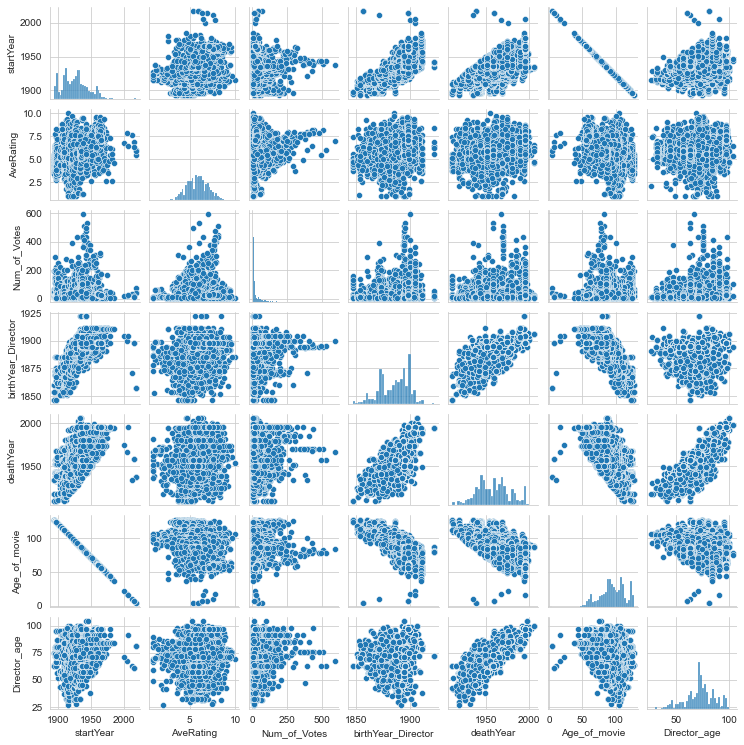

In [66]:
sns.set_style("whitegrid");
sns.pairplot(IMDB_data_NoDup_copy, height = 1.5)
plt.show()


In [67]:
#sns.heatmap(IMDB_data_NoDup_copy)

[Text(0.5, 1.0, 'Histogram: AveRating')]

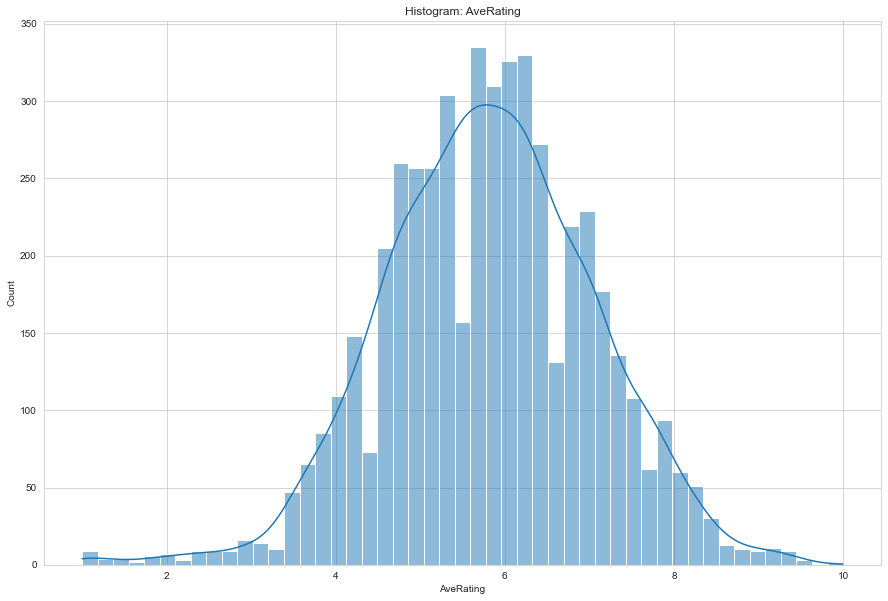

In [69]:
plt.figure(figsize=(15,10))
sns.histplot(data = IMDB_data_NoDup_copy,x = 'AveRating', kde = True).set(title='Histogram: AveRating')


In [70]:
# AveRating are normally distributed. 

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs startYear')]

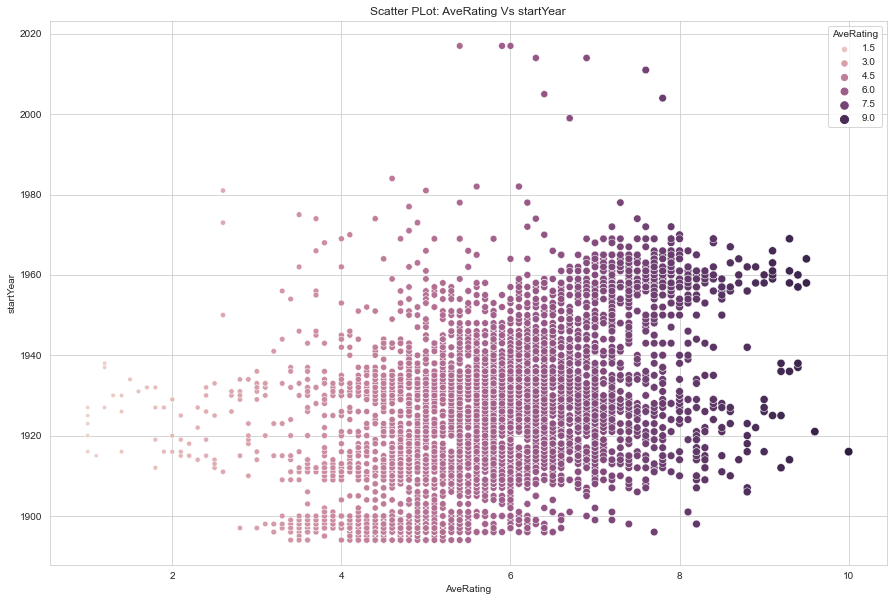

In [71]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="startYear", hue = "AveRating"
                , size="AveRating").set(title='Scatter PLot: AveRating Vs startYear')
                

# BoxPlot: AveRating Vs startYear 

<AxesSubplot:xlabel='AveRating', ylabel='startYear'>

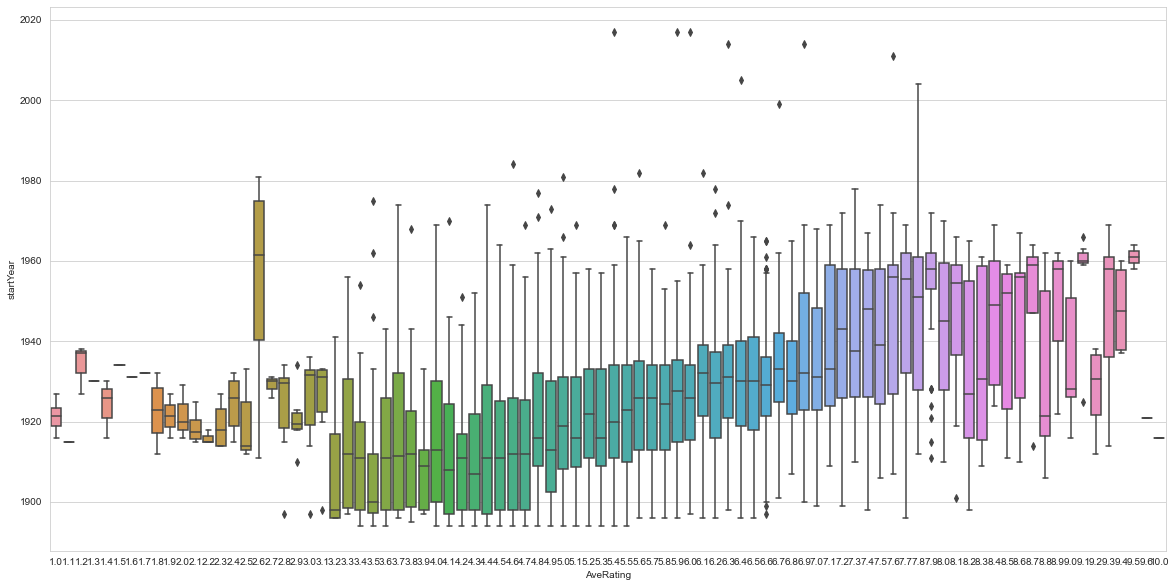

In [72]:
plt.figure(figsize=(20,10))
sns.boxplot(data=IMDB_data_NoDup_copy, x="AveRating", y="startYear")

# Scatterplot: AveRating Vs Num_of_Votes

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs Num_of_Votes')]

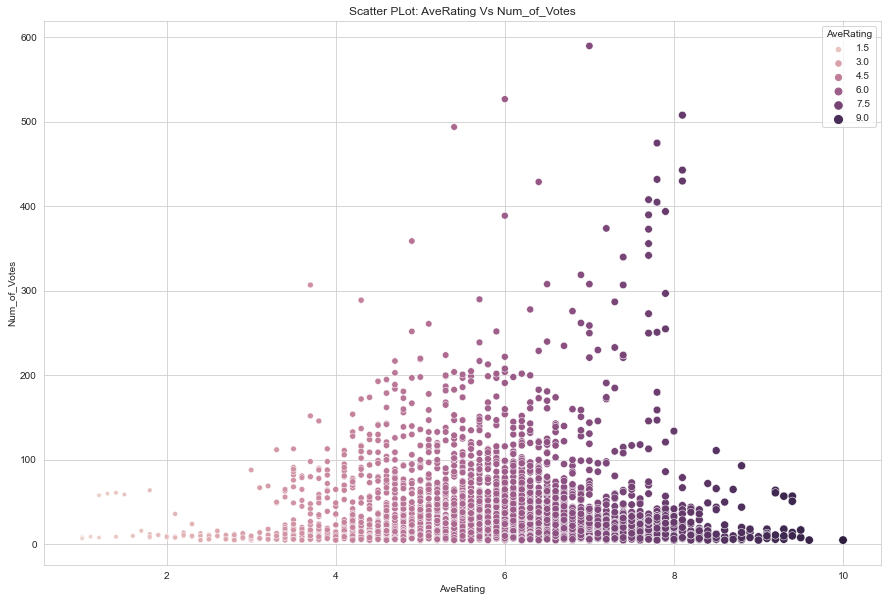

In [73]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="Num_of_Votes", hue = "AveRating"
                , size="AveRating").set(title='Scatter PLot: AveRating Vs Num_of_Votes')

In [ ]:
# Rating lies between 3.5 to 8.5. Few movies are given 250 num_ofVotes where as most of the has given 0-200 ratings 

# ScatterPLot: AveRating Vs Dirctor_age

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs Director_age')]

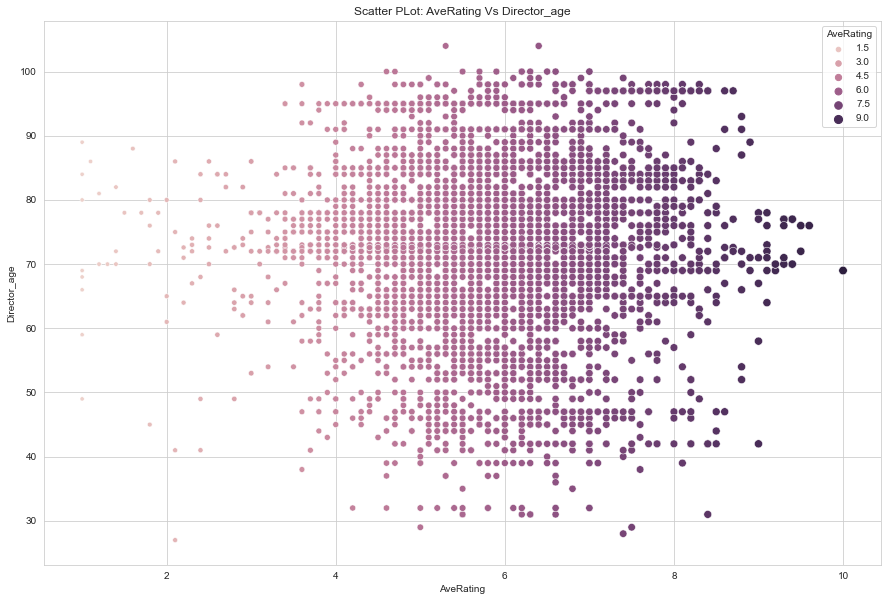

In [77]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="Director_age", hue = "AveRating"
                , size="AveRating").set(title='Scatter PLot: AveRating Vs Director_age')

In [78]:
# Director's age isn't really affecting the rating of the movie. We can see their is no such pattern where age is related to good 
#movie. High rated movie can be made by any age group. Age of the director is not related to the movie rating

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs Director_age')]

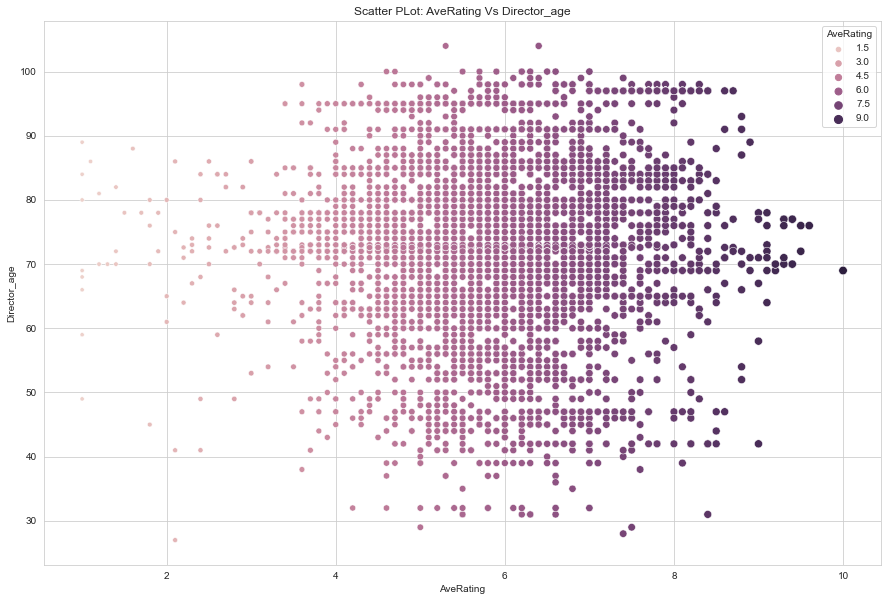

In [79]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="Director_age", hue = "AveRating"
                , size="AveRating").set(title='Scatter PLot: AveRating Vs Director_age')

In [80]:
#fig = px.histogram(IMDB_data_NoDup_copy)

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs Age_of_movie')]

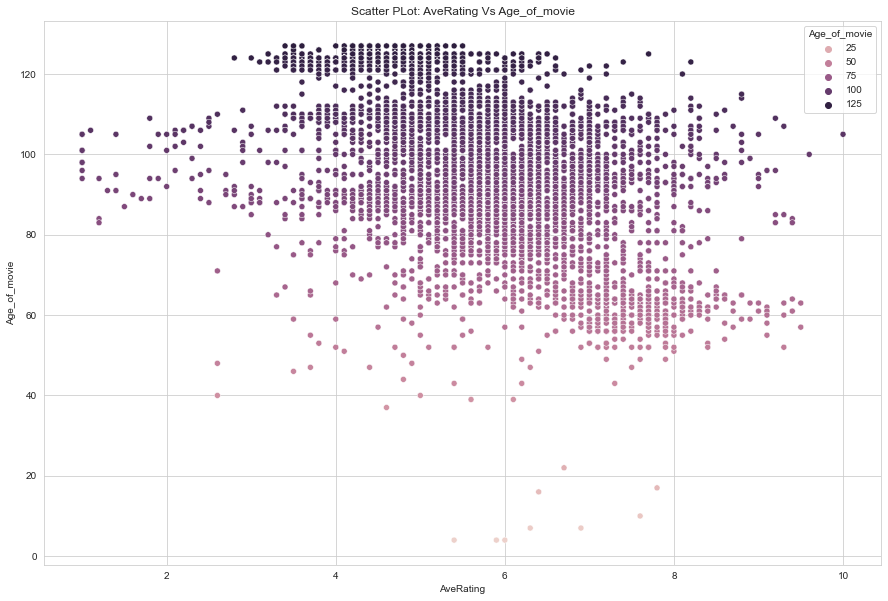

In [81]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="Age_of_movie", hue = "Age_of_movie"
               ).set(title='Scatter PLot: AveRating Vs Age_of_movie')

In [82]:
# We have few oldest movies whcih have high rating and few old movie with high rating or ratign between 4-8. but there is 
#no movie rating for the movies with 20-40 years old expect few. It can be due lack of enough exploratory data. 

# Scatter plot: region vs AveRating

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs region')]

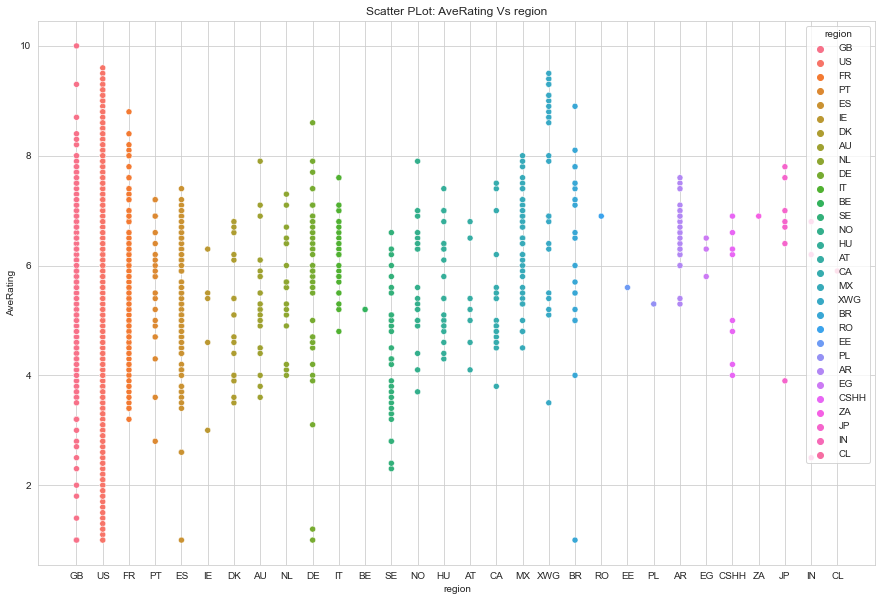

In [83]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="region", y="AveRating", hue = "region"
               ).set(title='Scatter PLot: AveRating Vs region')

In [84]:
# above plot t=show the movie rating region vise and it shows that us has movies which all kinds of rating and other regions
# mostly scattered around 3.5 9.

# Scatter Plot: Age_of_movie Vs region

[Text(0.5, 1.0, 'Scatter PLot: Age_of_movie Vs region')]

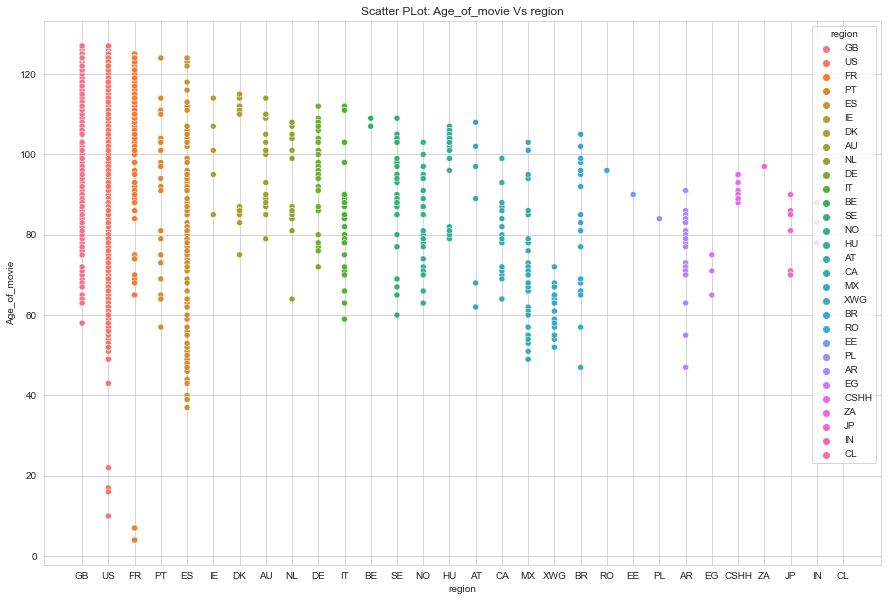

In [85]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="region", y="Age_of_movie", hue = "region"
               ).set(title='Scatter PLot: Age_of_movie Vs region')

# Scatter plot: AveRating Vs titleType'

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs titleType')]

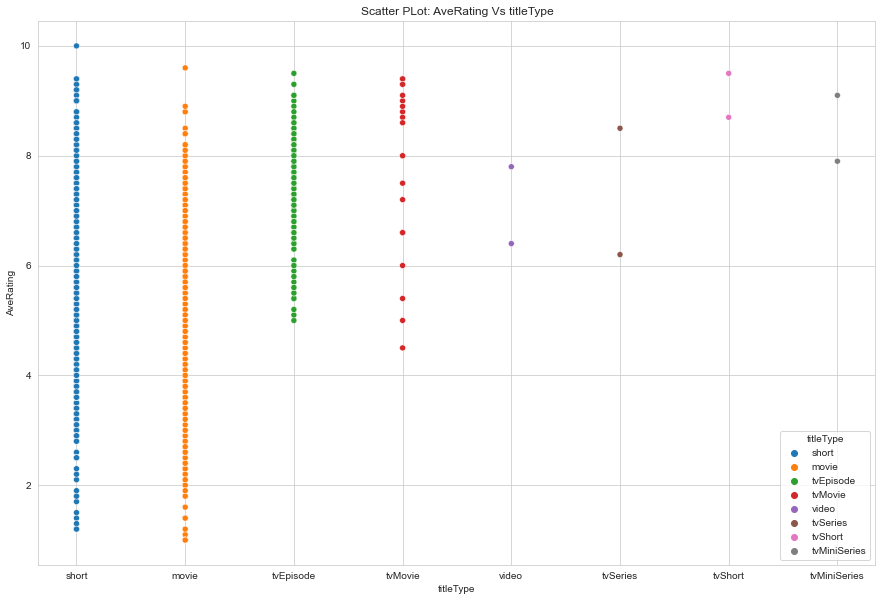

In [86]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="titleType", y="AveRating", hue ="titleType"
               ).set(title='Scatter PLot: AveRating Vs titleType')
#hue = "region").set(title='Scatter PLot: Age_of_movie Vs region')

In [87]:
# AveRating for short movie and movies is vary from 1.5 to 9.5. tvEpisodes have rating from 5 to 9.5 others have very few ratings

# Scatter Plot: Ave_Rating Vs genre

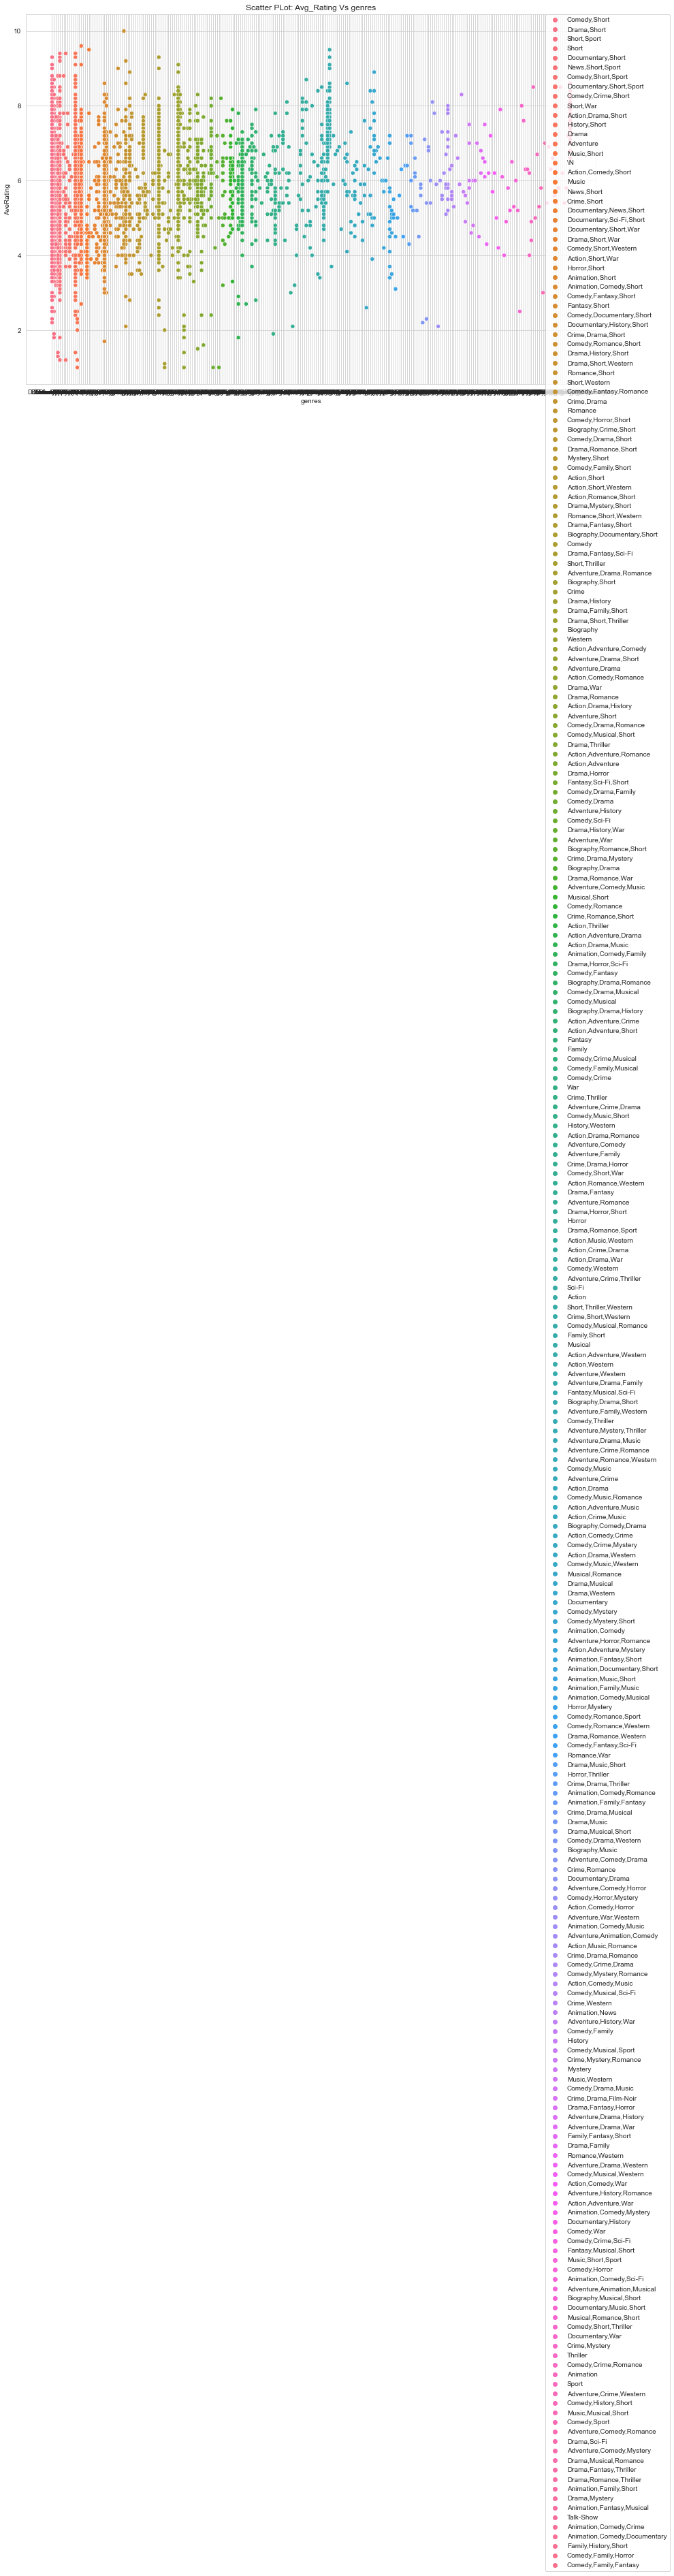

In [88]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="genres", y="AveRating", hue = "genres"
               ).set(title='Scatter PLot: Avg_Rating Vs genres')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper center', borderaxespad=0)

In [91]:
#from above plot we can see that peopple are more likly to watch comedy, drama and sport movies and has been given high rating. 

# Scatter Plot: directors vs AveRating

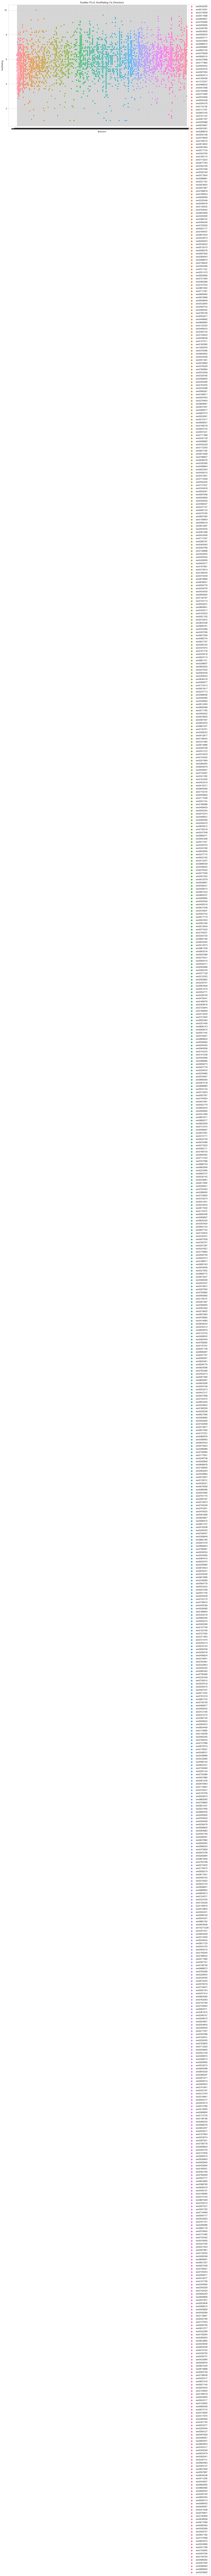

In [92]:
#Plot between directors and AveRating
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="directors", y="AveRating", hue = "directors"
               ).set(title='Scatter PLot: AveRating Vs Directors')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper center', borderaxespad=0)


#from above plot we can see that except few director, mostly directors lie between 4- 8 movie rating range

# Scatter Plot: directors vs Num_of_Votes 

[Text(0.5, 1.0, 'Scatter PLot: directors Vs Num_of_Votes')]

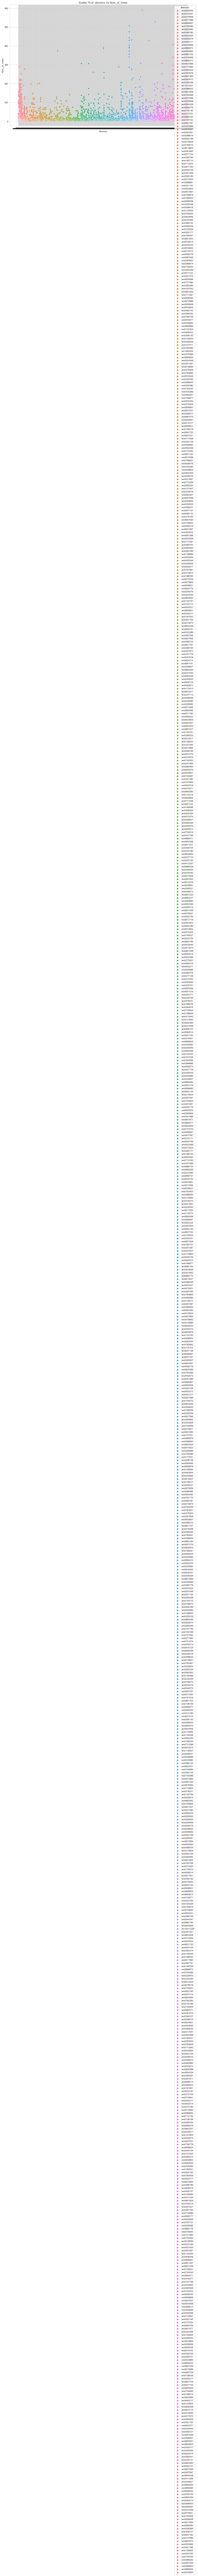

In [93]:
#Plot between AveRating Vs directors.

plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="directors", y="Num_of_Votes", hue ="directors"
               ).set(title='Scatter PLot: directors Vs Num_of_Votes')

# Scatter Plot: directors_age vs AveRating 

[Text(0.5, 1.0, 'Scatter PLot: Director_age Vs AveRating')]

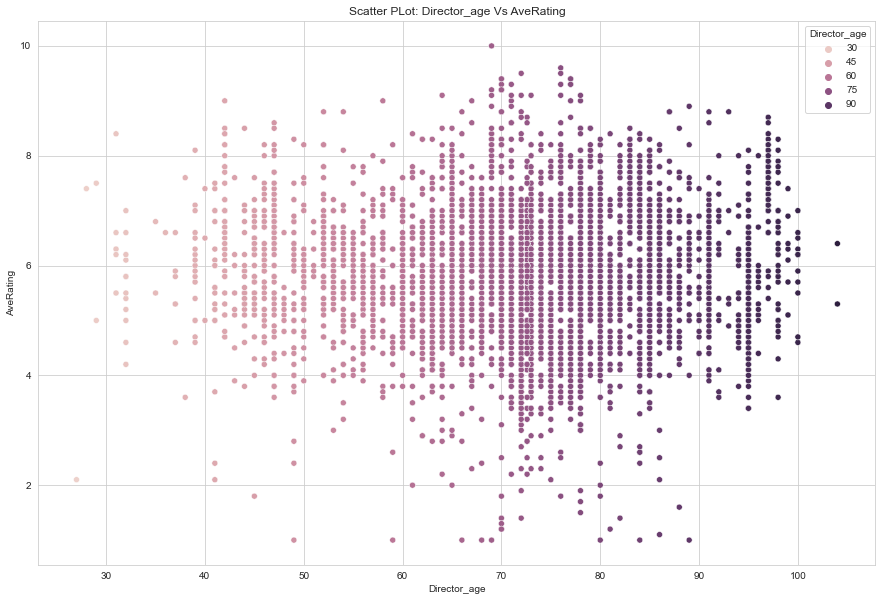

In [94]:
#Plot between directors and AveRating
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="Director_age", y='AveRating' , hue = "Director_age"
               ).set(title='Scatter PLot: Director_age Vs AveRating')

# Scatter Plot: Decade vs AveRating 

[Text(0.5, 1.0, 'Scatter PLot: Decade Vs AveRating')]

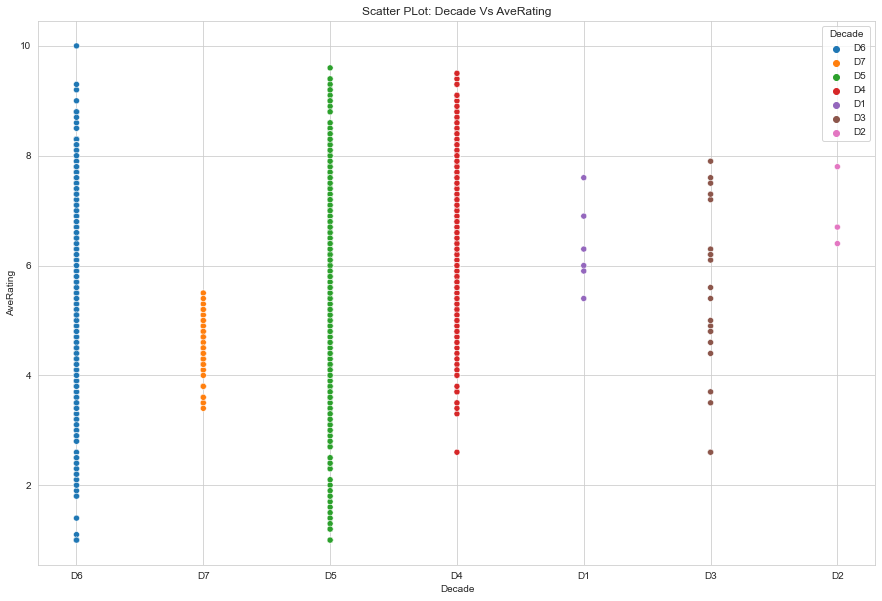

In [95]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="Decade", y= "AveRating" , hue = "Decade"
               ).set(title='Scatter PLot: Decade Vs AveRating')

# Scatter Plot: primaryProfession_director vs AveRating 

[Text(0.5, 1.0, 'Scatter PLot: primaryProfession_director Vs AveRating')]

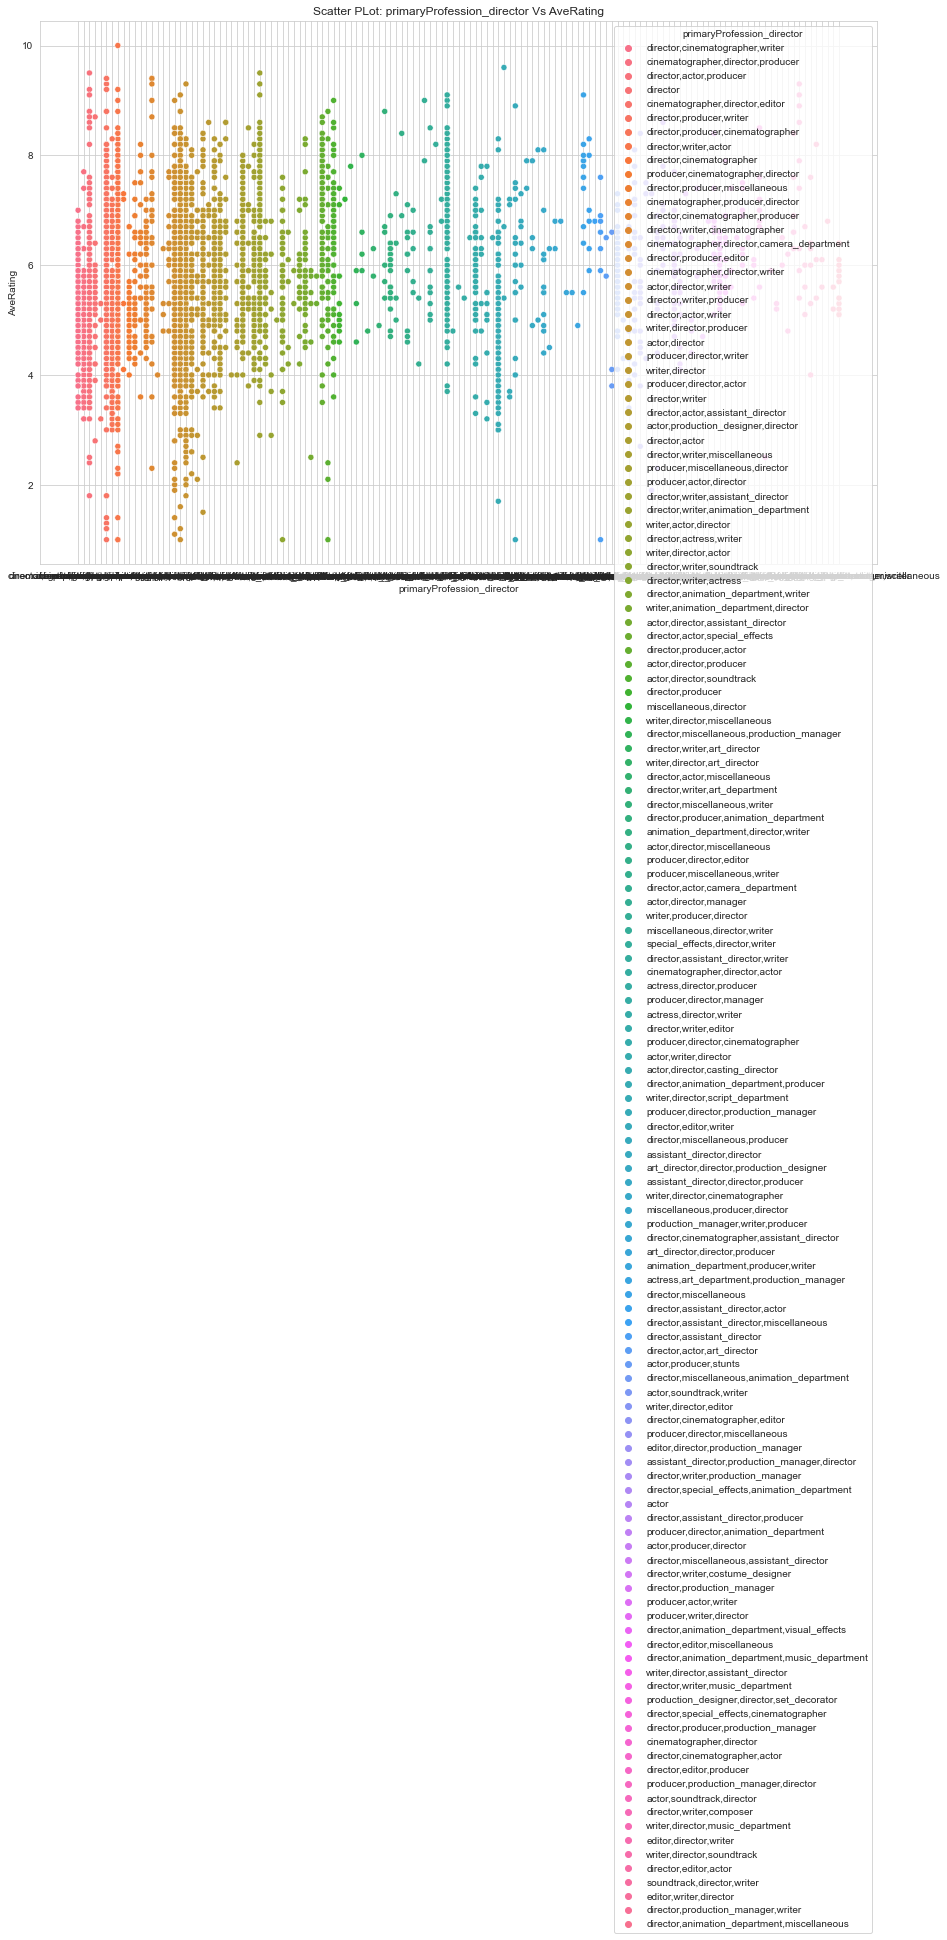

In [97]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="primaryProfession_director", y= "AveRating" , hue = "primaryProfession_director"
               ).set(title='Scatter PLot: primaryProfession_director Vs AveRating')
